In [1]:
import tensorflow as tf
import numpy as np
import sys
sys.path.append('../')
import utils.preprocess as preprocess
import utils.metrics as met

In [2]:
pre = preprocess.preprocess("D:/DataSet/CICIDS2017/CSV/Wednesday-workingHours.pcap_ISCX.csv", labelColumnName='Label', depth=2)
X_train, X_test, y_train, y_test = pre.preprocessing()

In [3]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [4]:
import utils.network.network11 as model

In [5]:
net = model.MyLstmModel()

In [6]:
algorithm = tf.keras.optimizers.RMSprop(learning_rate=0.015, rho=0.9, momentum=0.9, epsilon=1e-07, decay= 1e-06, centered=False, name='RMSprop')
# algorithm = tf.keras.optimizers.SGD(learning_rate=0.015, clipnorm=0.9, momentum=0.95, nesterov=True, name='SGD')

net.compile(optimizer=algorithm, loss='binary_crossentropy', metrics=met.ModelMetric("binary_crossentropy").metric()) # categorical_crossentropy

In [7]:
from tensorflow.keras import callbacks
import datetime
dir_name = datetime.datetime.now().strftime("%Y%m%d-%H%M%S-network11-RMSprop")
logdir = os.path.join("../tensorboard", dir_name)
tensorboard_callback = callbacks.TensorBoard(logdir, histogram_freq=1)
# lrate = callbacks.LearningRateScheduler(opt_.exp_decay)
csv_log = tf.keras.callbacks.CSVLogger('../trainLog/'+dir_name, separator=',', append=False)

In [8]:
import numpy as np
model_ = net.fit(X_train, y_train, epochs=40, batch_size=512, validation_split=0.3, callbacks=[tensorboard_callback, csv_log], verbose=1) # lrate

- precision: 0.9306 - recall: 0.9306 - auc: 0.9750 - binary_accuracy: 0.9306 - binary_crossentropy: 0.2178 - val_loss: 0.3212 - val_tp: 141148.0000 - val_fp: 4320.0000 - val_tn: 141148.0000 - val_fn: 4320.0000 - val_acc: 0.0000e+00 - val_precision: 0.9703 - val_recall: 0.9703 - val_auc: 0.9944 - val_binary_accuracy: 0.9703 - val_binary_crossentropy: 0.1873
Epoch 4/40
663/663 [==============================] - 37s 55ms/step - loss: 0.3877 - tp: 317217.0000 - fp: 22207.0000 - tn: 317217.0000 - fn: 22207.0000 - acc: 0.0000e+00 - precision: 0.9346 - recall: 0.9346 - auc: 0.9759 - binary_accuracy: 0.9346 - binary_crossentropy: 0.2144 - val_loss: 0.3136 - val_tp: 141233.0000 - val_fp: 4235.0000 - val_tn: 141233.0000 - val_fn: 4235.0000 - val_acc: 0.0000e+00 - val_precision: 0.9709 - val_recall: 0.9709 - val_auc: 0.9922 - val_binary_accuracy: 0.9709 - val_binary_crossentropy: 0.1501
Epoch 5/40
663/663 [==============================] - 33s 49ms/step - loss: 0.3873 - tp: 318878.0000 - fp: 2054

In [9]:
from utils.evl_metrics import getTrainMetricValue
results  = net.evaluate(X_test, y_test, verbose=1)
getTrainMetricValue(net, results)

6495/6495 [==============================] - 221s 34ms/step - loss: 0.3218 - tp: 202128.0000 - fp: 5683.0000 - tn: 202128.0000 - fn: 5683.0000 - acc: 0.0000e+00 - precision: 0.9727 - recall: 0.9727 - auc: 0.9939 - binary_accuracy: 0.9727 - binary_crossentropy: 0.1160
loss :  0.3218422830104828

tp :  202128.0

fp :  5683.0

tn :  202128.0

fn :  5683.0

acc :  0.0

precision :  0.9726530313491821

recall :  0.9726530313491821

auc :  0.9939000010490417

binary_accuracy :  0.9726530313491821

binary_crossentropy :  0.11601424217224121



In [10]:
from utils.evl_metrics import confusion_matrix, eva_metric
y_pred = net.predict(X_test)
y_class = np.argmax(y_pred, axis=1)
y_label = np.argmax(y_test, axis=1)
confusion_matrix(y_label, y_class)
eva_metric(y_label, y_class)

TrueNegatives result:  127504.0
TruePositives result:  74624.0
FalseNegatives result:  1053.0
FalsePositives result:  4630.0
Recall result:  0.9860856
Precision result:  0.94158024


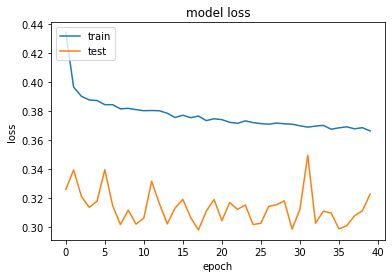

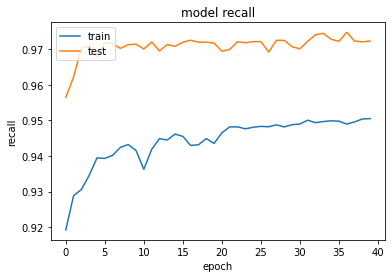

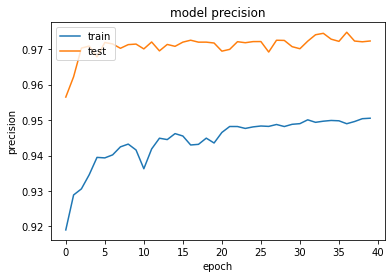

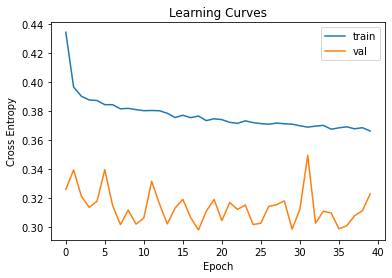

In [11]:
import utils.graph as fig
fig.add_dir(dir_name)
fig.loss_graph(model_,dir_name)
fig.recall_graph(model_,dir_name)
fig.precision_graph(model_,dir_name)
fig.cross_entropy_graph(model_,dir_name)